# **Uploading Necessary Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score

# **Loading Dataset:**

In [ ]:
# Reading the data
url = 'https://raw.githubusercontent.com/YazenSH/DataForCPCS331Project/main/Bank_Data.csv'
df = pd.read_csv(url)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#statistical summary of the DataFrame
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.info() # Checking data type information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Note: We have some null values in CREDIT_LIMIT and MINIMUM_PAYMENTS. We will deal with it later on.

# **Data Treatments:**

In [ ]:
# Counting the missing values in each column and sorting them in descending order
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

Note - NULL values confirmed

In [ ]:
# Replacing missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS columns with the mean of the column
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace = True)
df['CREDIT_LIMIT'].fillna((df['CREDIT_LIMIT'].mean()), inplace = True)

In [ ]:
# Making sure no null values left
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

NULL values treated and verified

In [ ]:
# Removing the 'CUST_ID' column and creating a new DataFrame 'num_df' with only numeric variables
num_df = df.drop("CUST_ID", axis=1)

# Displaying information about the DataFrame 'num_df' to show data types and non-null counts
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Excluded object type variable

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

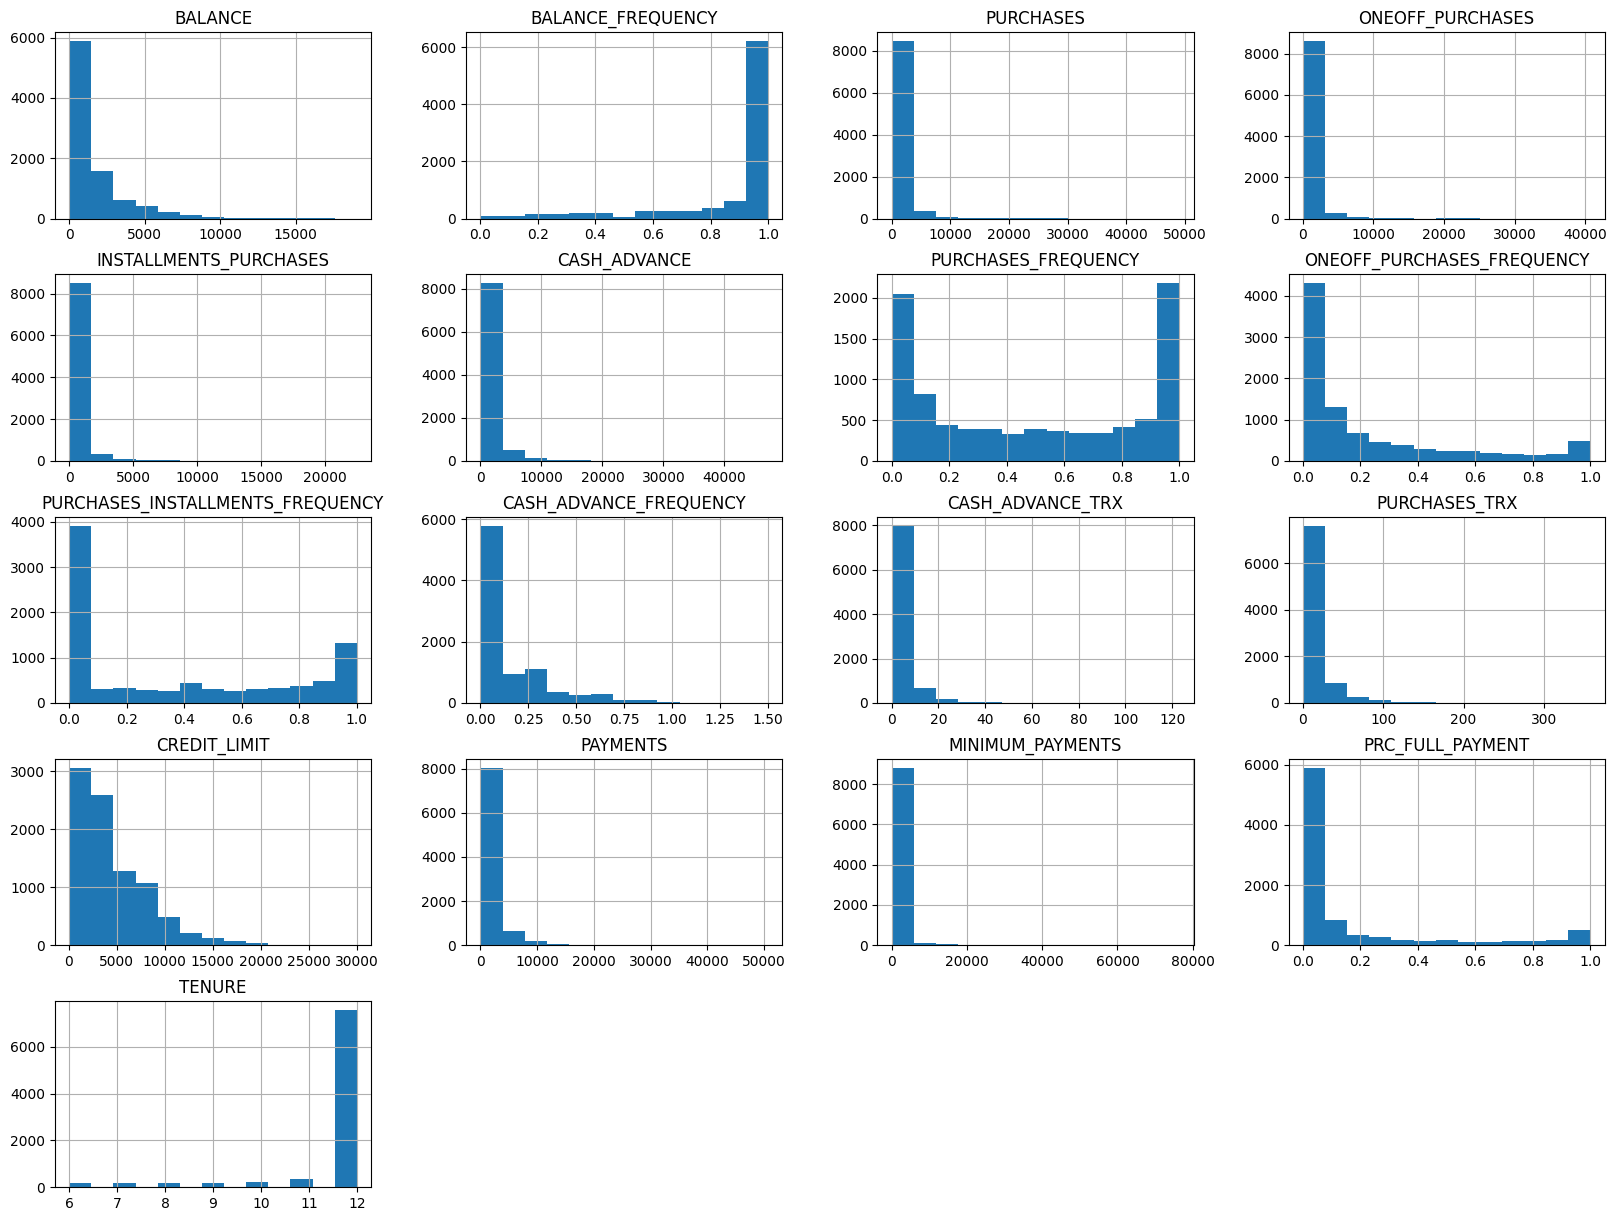

In [ ]:
# Generating histograms for numeric columns in the DataFrame 'num_df'
num_df.hist(bins=13, figsize=(20, 15), layout=(5, 4))

# **Feature Correlation:**

<Axes: >

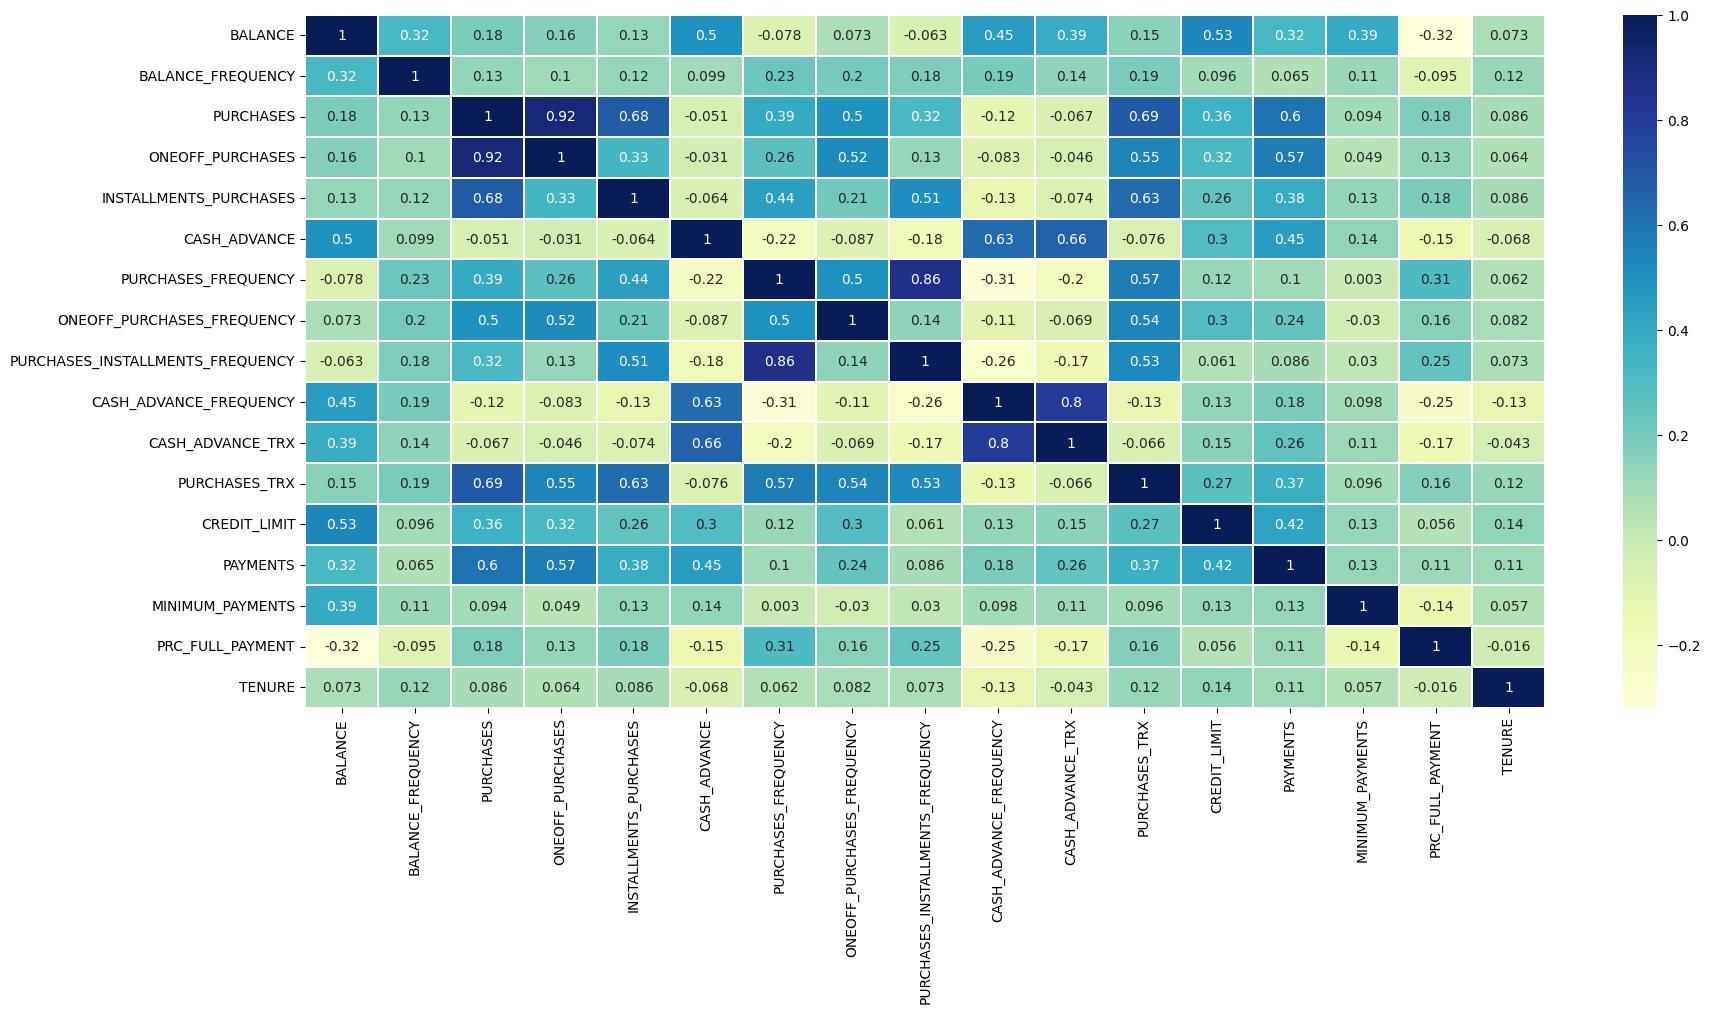

In [ ]:
# Calculating the correlation matrix for numeric columns in the DataFrame 'num_df'
corrmat = num_df.corr()

# Creating a heatmap to visualize the correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True)

#### **In customer segmentation, we don't only focus on high correlation; we also consider the meaning of each data column.**
Deduction - High Postive Corelation observed between CREDIT_LIMIT-BALANCE, PAYMENTS-PURCHASES


### Analysis

# **2D K Means Clustering for better understanding of Feature Correlation:**

**1. Corelation observed between CREDIT_LIMIT-BALANCE**

In [ ]:
# Selecting columns CREDIT_LIMIT and BALANCE columns from the DataFrame 'num_df'
X = num_df.iloc[:, [12, 0]]
# Displaying the first few rows of the new DataFrame 'X'
X.head()

,CREDIT_LIMIT,BALANCE
0,1000.0,40.900749
1,7000.0,3202.467416
2,7500.0,2495.148862
3,7500.0,1666.670542
4,1200.0,817.714335


In [ ]:
#standraizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

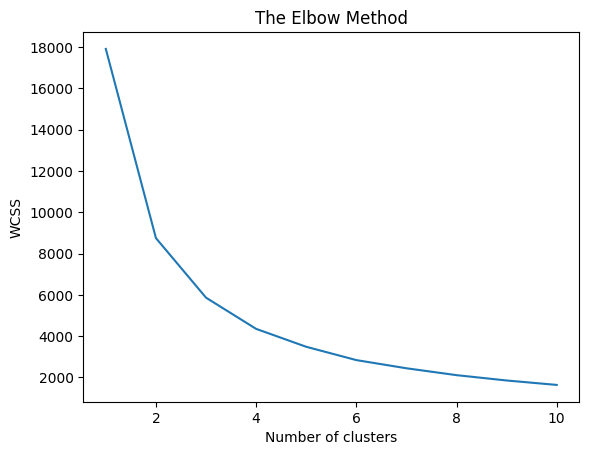

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note: using The Elbow method we conclude that Optimal clusters = 4

In [ ]:
# Initializing a KMeans model with 4 clusters using k-means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Assigning each data point in 'X' to a cluster and obtaining cluster labels
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


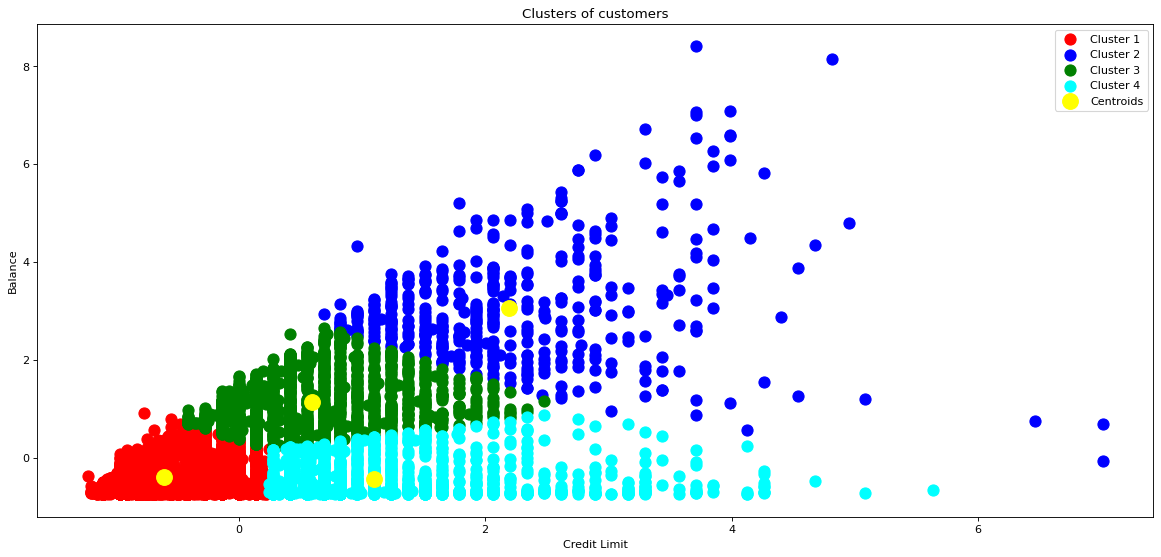

In [ ]:
# Creating a scatter plot to visualize clusters and centroids based on the first two features
plt.figure(figsize=(18, 8), dpi=80)

# Scatter plots for each cluster based on their assigned labels from KMeans
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

# Adding labels and legend to the plot
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

**Analysis:**
* From the sequence of left to right, the first centrod **"Cluster 3"** signifies customers where both credit limit and  balance are low which shows that these customers doesnot have much purchasing power and shoudld not be our focus area
* Customers falling under the second centroid bracket **"Cluster 1"** are somewhat engaging with us but since their balance and credit limits are low, their purchasing power will not be that high. Some special benifits in terms of better credit limit can be given to convert them into next class
* Customers falling under the third centroid **"Cluster 2"** are the most valuable. Their credit limit is high and so are their balance. This category customers should be targeted with better offers to shop via our credit card. They are our most performing customers
* Custmers in the last centriod **"Cluster 4"** are the ones whose balance is low but they have high credit limit which suggest that these customers are loyal and shoudld be retaned by giving engagement offers

##Testing my result

In [ ]:
# Obtain the cluster labels
labels = kmeans.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5279667996720144


Silhouette measures the quality of clustering by calculating the average distance between data points within the same cluster compared to the average distance between data points in different clusters. The silhouette score ranges from -1 to 1, where a higher value indicates better-defined clusters.

In the case of K-means, a silhouette score of 0.52 suggests that the clusters are reasonably well-separated. However, it doesn't provide information about the correctness of the clusters or how well they align with the ground truth (if available).

**2. Corelation observed between PURCHASES-PAYMENTS**

In [ ]:
# Selecting columns at specific indices (2nd and 13th columns) from the DataFrame 'num_df'
X = num_df.iloc[:, [2, 13]]
# Displaying the first few rows of the new DataFrame 'X'
X.head()

,PURCHASES,PAYMENTS
0,95.40,201.802084
1,0.00,4103.032597
2,773.17,622.066742
3,1499.00,0.000000
4,16.00,678.334763


In [ ]:
#standraizing the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

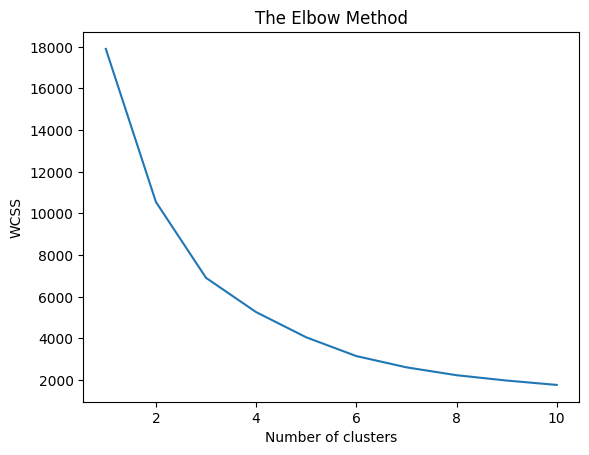

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Note - Number of optimal clusters should be 4

In [ ]:
# Initializing a KMeans model with 4 clusters using k-means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Assigning each data point in 'X' to a cluster and obtaining cluster labels
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


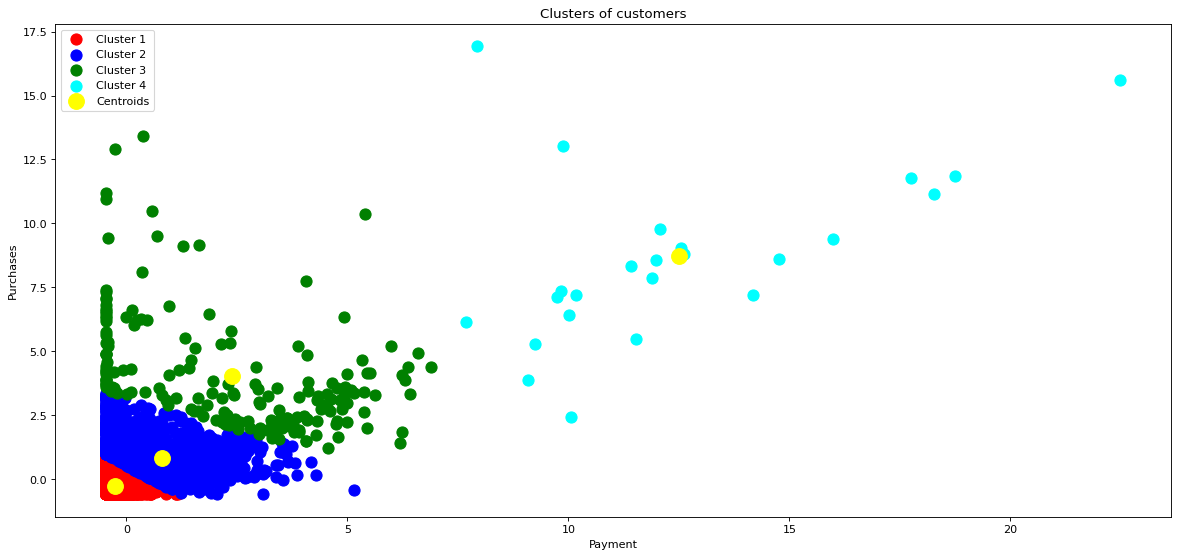

In [ ]:
# Creating a scatter plot to visualize clusters and centroids based on two features
plt.figure(figsize=(18, 8), dpi=80)

# Scatter plots for each cluster based on their assigned labels from KMeans
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

# Adding labels and legend to the plot
plt.title('Clusters of customers')
plt.xlabel('Payment')
plt.ylabel('Purchases')
plt.legend()
plt.show()


**Analysis:**

* From the sequence of left to right, the first centrod **"Cluster 1"** signifies customers where both credit limit and  balance are low which shows that these customers doesnot have much purchasing power and shoudld not be our major focus area
* Customers falling under the second centroid bracket **"Cluster 2"** are somewhat engaging with us but since their purchases and payment are low, their purchasing power is not be that high. Thus, some special benifits in terms of better credit limit or discounts can be given to convert them into next class
* Customers falling under the third centroid **"Cluster 3"** are the most valuable. Their payment is low but their purchases is high. These customers likes to shop on offers and discounts and can be better targeted by doscount and cashback coupons on credit card usage
* Custmers in the last centriod **"Cluster 4"** are our honest customers. They pay more to purchase more and should be retained by providing customer engagement benifits

In [ ]:
# Obtain the cluster labels
labels = kmeans.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6387248459899973


Silhouette measures the quality of clustering by calculating the average distance between data points within the same cluster compared to the average distance between data points in different clusters. The silhouette score ranges from -1 to 1, where a higher value indicates better-defined clusters.

In the case of K-means, a silhouette score of 0.64 suggests that the clusters are reasonably well-separated. However, it doesn't provide information about the correctness of the clusters or how well they align with the ground truth (if available).

# **3D K Means Clustering for The 4 features**

In [ ]:
#Using the 4 columns
X = df.loc[:, ['CREDIT_LIMIT','BALANCE','PAYMENTS','PURCHASES']].copy()

In [ ]:
#Using PCA to transform 4 features into 3 features
pca = PCA(n_components=3)
new_features = pca.fit_transform(X)

scaler = StandardScaler()
new_features = scaler.fit_transform(new_features)

PCA_ds = num_df.copy()
PCA_ds[["Feature 1", "Feature 2", "Feature 3"]] = pd.DataFrame(new_features, columns=["Feature 1", "Feature 2", "Feature 3"])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1.564475e+03,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,8.772707e-01,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1.003205e+03,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,5.924374e+02,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,4.110676e+02,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,9.788711e+02,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,4.903505e-01,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,2.024577e-01,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,3.644373e-01,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,1.351442e-01,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


<ipython-input-1084-05e7bd160eb8>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z, marker="o" ,cmap='viridis')


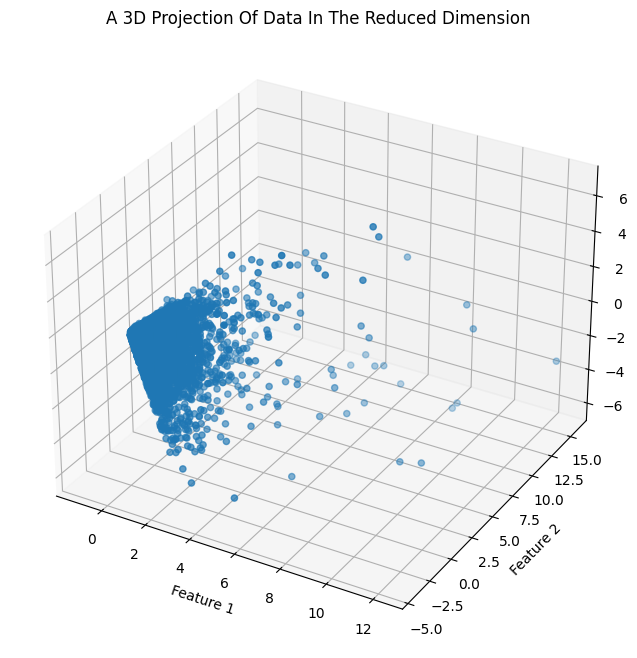

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["Feature 1"]
y =PCA_ds["Feature 2"]
z =PCA_ds["Feature 3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.scatter(x,y,z, marker="o" ,cmap='viridis')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

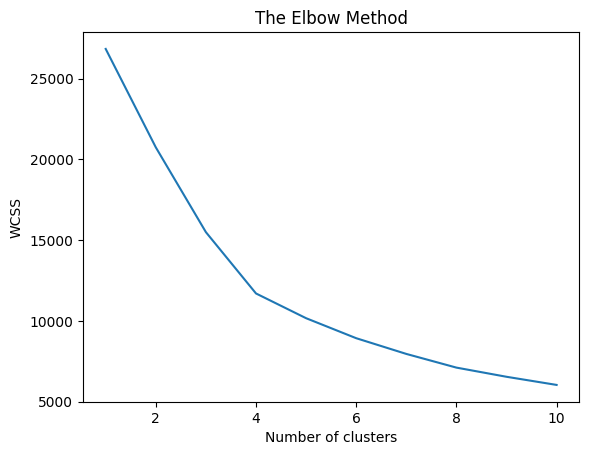

In [ ]:
#finding the WCSS to apply elbow method for choosing number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### As we see 4 is still the best option

In [ ]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_pca.fit(new_features)

PCA_ds["Clusters"] = (kmeans_pca.labels_+1)

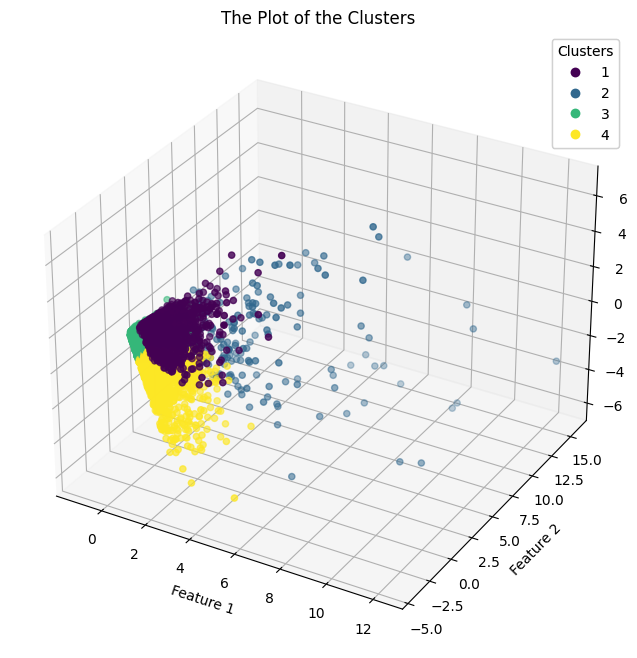

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=PCA_ds["Clusters"], marker='o', cmap='viridis')

# Set labels and title for the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('The Plot of the Clusters')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

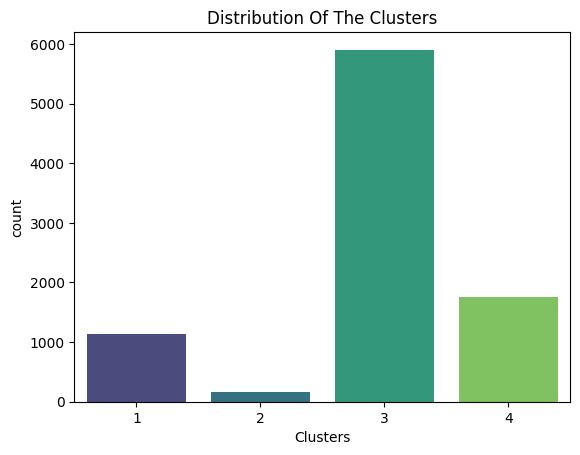

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=PCA_ds["Clusters"], palette= 'viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

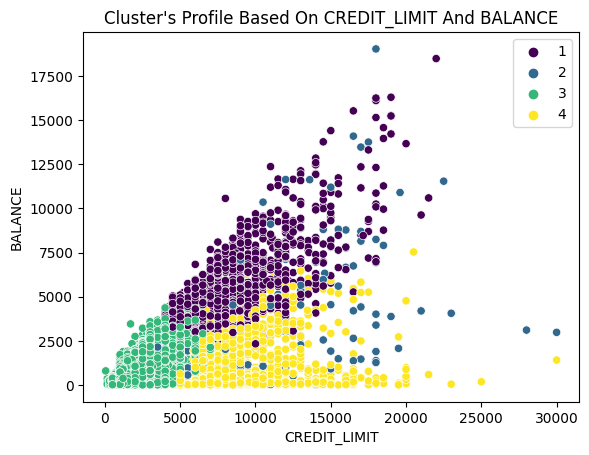

In [ ]:
pl = sns.scatterplot(data = num_df,x=num_df["CREDIT_LIMIT"], y=num_df["BALANCE"],hue=PCA_ds["Clusters"], palette= 'viridis')
pl.set_title("Cluster's Profile Based On CREDIT_LIMIT And BALANCE")
plt.legend()
plt.show()

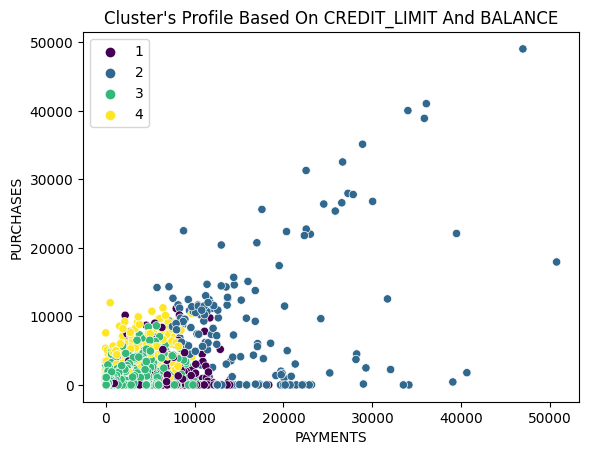

In [ ]:
pl = sns.scatterplot(data = num_df,x=num_df["PAYMENTS"], y=num_df["PURCHASES"],hue=PCA_ds["Clusters"], palette= 'viridis')
pl.set_title("Cluster's Profile Based On CREDIT_LIMIT And BALANCE")
plt.legend()
plt.show()

It is almost the same as what we had in the 2D section but with some more noise due to the dimension reduction.

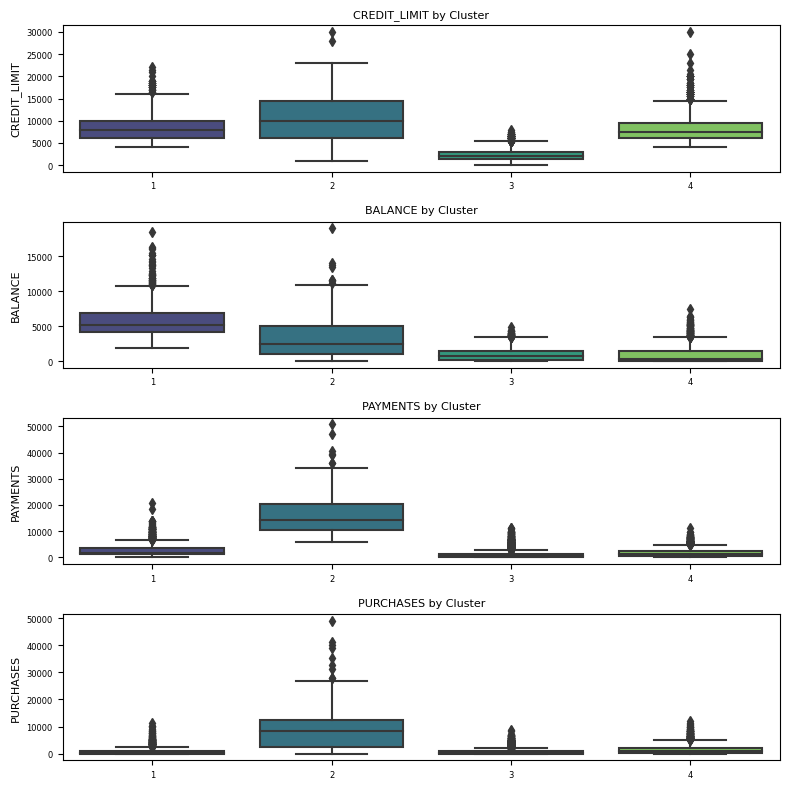

In [ ]:
columns = ['CREDIT_LIMIT','BALANCE','PAYMENTS','PURCHASES']

fig, ax = plt.subplots(4, 1, figsize=(8, 8))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot(data=PCA_ds, x='Clusters', y=column, ax=ax[i], palette='viridis')
    ax[i].set_title(f'{column} by Cluster', fontsize=8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel(column, fontsize=8)
    ax[i].tick_params(axis='both', which='both', labelsize=6)

plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

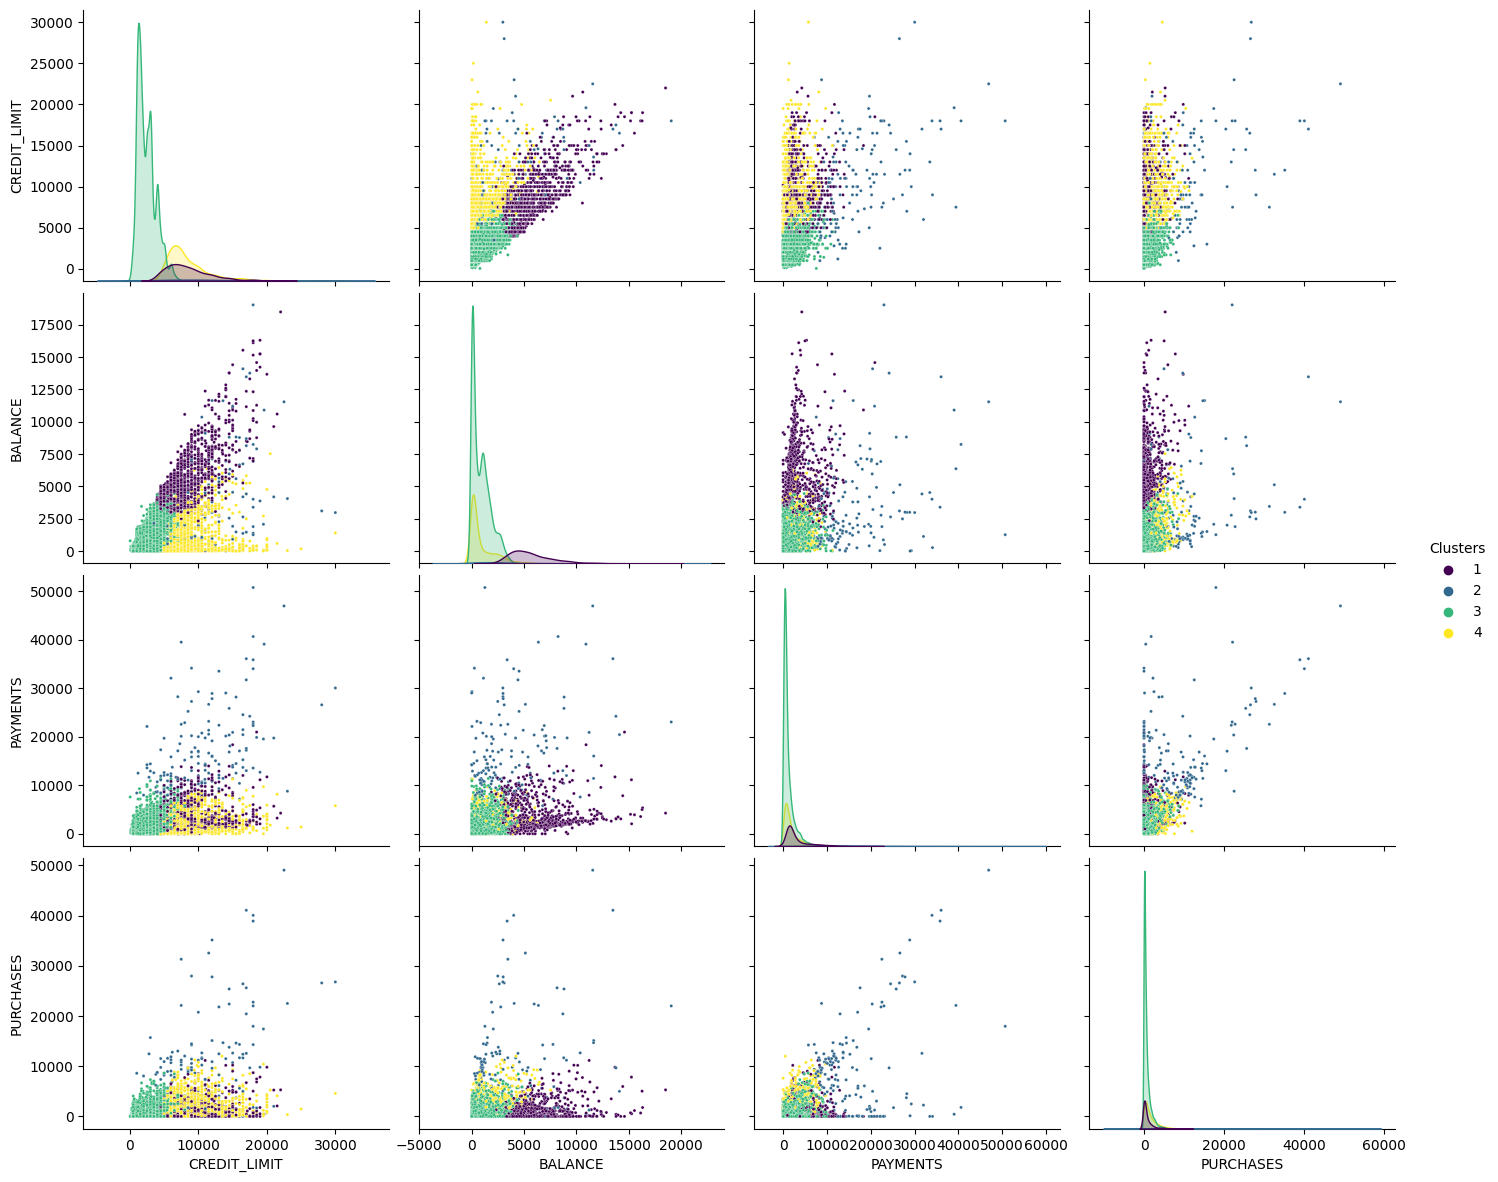

In [ ]:
plt.figure(figsize=(20, 20))
pairplot = sns.pairplot(PCA_ds, vars=columns, hue='Clusters',
                        palette='viridis', plot_kws={'s': 5}, height=3, aspect=1.2)
plt.show()

####**We can see here the relationship between the features. It shows that PCA confirms our analysis for the 2D section.**

In [ ]:
# Obtain the cluster labels
labels = kmeans_pca.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(new_features, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4563986209591909


A decrease in the silhouette score after applying PCA is not necessarily unexpected. PCA is a dimensionality reduction technique that can project high-dimensional data onto a lower-dimensional space. In the process, some information may be lost, which can affect the clustering performance.

A decrease in the silhouette score from 0.51 to 0.46 suggests that the clusters became less well-separated or more overlapping after applying PCA. This could be due to the reduction in dimensionality causing some loss of information or the specific characteristics of your data.

## **Lastly, Selecting most coloumns and see after using PCA if we will got similar clusters**

In [ ]:
#Excluding features which have little impact
columns_to_exclude=['BALANCE_FREQUENCY', 'TENURE' ,'MINIMUM_PAYMENTS' ,'PRC_FULL_PAYMENT']
X = num_df.drop(columns=columns_to_exclude)
X.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
0,40.900749,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084
1,3202.467416,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597
2,2495.148862,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742
3,1666.670542,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000
4,817.714335,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763


In [ ]:
#Using PCA to transform into 3 features
pca1 = PCA(n_components=3)
new_X = pca1.fit_transform(X)

In [ ]:
#Standrazing the features
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

In [ ]:
#Applying Kmeans
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
kmeans_pca.fit(new_X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
df_pca2 = pd.DataFrame(data=new_X, columns=['Feature 1', 'Feature 2','Feature 3'])
df_pca2['Cluster'] = (kmeans_pca.labels_ +1)
df_final = num_df.copy()
df_final['Cluster'] = (kmeans_pca.labels_ +1)

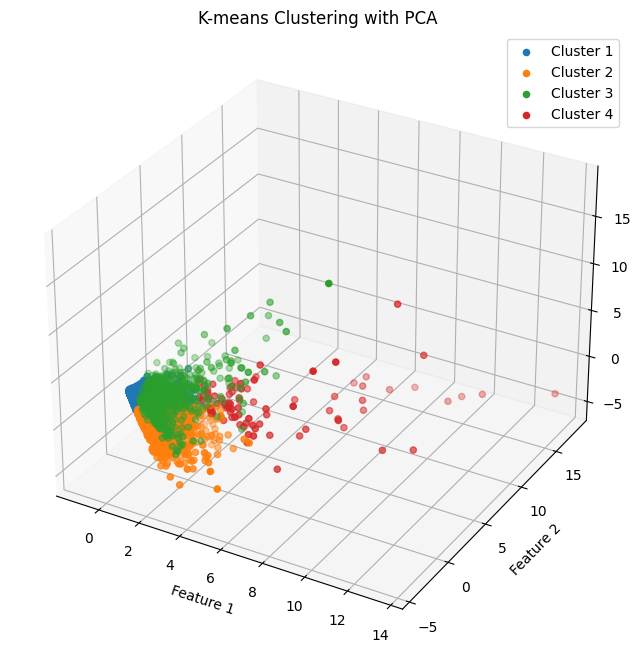

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Specify the cluster labels you want to plot
selected_clusters = [ 1, 2, 3 ,4 ]

for cluster in selected_clusters:
    cluster_data = df_pca2[df_pca2['Cluster'] == cluster]
    ax.scatter(cluster_data['Feature 1'], cluster_data['Feature 2'], cluster_data['Feature 3'], label=f'Cluster {cluster}')


# Set labels and title for the plot
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering with PCA')

# Add a legend
ax.legend()

# Show the plot
plt.show()

We can see that it has some similarities to what we did with the previous section. We can notice some differences due to the large number of features that are squeezed into three features. Also, taking into consideration the standardization we did to all the columns, some had outliers, which made it hard to cluster.

In [ ]:
# Obtain the cluster labels
labels_with_PCA = kmeans_pca.labels_

# Compute the silhouette score
silhouette_avg = silhouette_score(new_X, labels_with_PCA)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4603659900683456


We got a silhouette score of around 0.5, which is considered good clustering. Better results can be achieved using advanced Data processing methods.